In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import GaussianSmoother
import spikeinterface
import spikeinterface.full as si
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import spikeinterface.postprocessing as sp
import spikeinterface.preprocessing as spre

In [2]:
#extract raw data
local_path= '/home/mxwbio/Desktop/MEA_Analysis/mandardata/data.raw.h5' #network data from chip 16848
#local_path= '/home/mxwbio/Desktop/MEA_Analysis/Syngap3data/networkdata.raw.h5'
#local_path = '/home/mxwbio/Desktop/MEA_Analysis/ASmouse/16874/Network/000225/data.raw.h5'
recording = se.read_maxwell(local_path)
# w_ts = sw.plot_timeseries(recording, time_range=(0, 300), channel_ids= recording.channel_ids[420:421])
# plt.axis([0, 300, 420, 580])

In [3]:
#data info
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_seg = recording.get_num_segments()
total_recording = recording.get_total_duration()

#print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)
print('Number of segments:', num_seg)
print(f"total_recording: {total_recording} s")

Sampling frequency: 20000.0
Number of channels: 1020
Number of segments: 1
total_recording: 600.09 s


In [4]:
#remove global avergae
#recording = spre.common_reference(recording,reference='global',operator='median')

#apply bandpass filter
recording_bp = spre.bandpass_filter(recording, freq_min=1, freq_max=3000)
print(recording_bp)
#bpf_ts = sw.plot_timeseries(recording_bp, time_range=(0, 300), channel_ids= recording.channel_ids[420:421])

BandpassFilterRecording: 1020 channels - 1 segments - 20.0kHz - 600.090s


In [5]:
recording_chunk2 = recording_bp.frame_slice(start_frame= 60*fs,end_frame=120*fs)

In [6]:
# scope
# parameters
smoothing_window_size = 0.3
burst_detection_threshold = 50
minimum_peak_distance = 1.0
start_stop_threshold = 0.3
#visualization
start_time = 0
end_time = 0
use_fixed_y_max = False
nework_activity_y_max = 4
# sorter output file dir
sorting_dir = ''

custom_KS3_params = {'detect_threshold': 50,
 'projection_threshold': [9, 9],
 'preclust_threshold': 8,
 'car': True,
 'minFR': 0.2,
 'minfr_goodchannels': 0.2,
 'nblocks': 5,
 'sig': 20,
 'freq_min': 300,
 'sigmaMask': 30,
 'nPCs': 3,
 'ntbuff': 64,
 'nfilt_factor': 4,
 'do_correction': True,
 'NT': None,
 'wave_length': 50,
 'keep_good_only': False,
 'n_jobs': 1,
 'total_memory': None,
 'chunk_size': None,
 'chunk_memory': None,
 'chunk_duration': '1s',
 'progress_bar': True}

In [7]:
#sorter info 
# how to change default params:
# https://spikeinterface.readthedocs.io/en/latest/modules/sorters/plot_1_sorters_example.html#sphx-glr-modules-sorters-plot-1-sorters-example-py

default_KS3_params = ss.get_default_sorter_params('kilosort3')
#default_KS3_params

In [8]:
#run smmorter
#run_sorter = ss.run_kilosort3(recording_bp, output_folder="kilosort3", docker_image="spikeinterface/kilosort3-compiled-base", **default_KS3_params)
#run_sorter = ss.run_kilosort3(recording_bp, output_folder="kilosort3_test", docker_image="spikeinterface/kilosort3-compiled-base", **custom_KS3_params)
run_sorter = ss.run_kilosort3(recording_chunk2, output_folder="kilosort3_test_mandar_60_120schunk", docker_image="latest:latest", verbose=True, **default_KS3_params)

#sorting_KS3 = ss.Kilosort3Sorter._get_result_from_folder('/home/mxwbio/Desktop/MEA_Analysis/kilosort3/')


Starting container
Installing spikeinterface==0.96.1 in latest:latest
Installing extra requirements: ['neo', 'h5py']
Running kilosort3 sorter inside latest:latest
parent_folder_unix:/home/mxwbio/Desktop/MEA_Analysis
Stopping container


In [8]:
sorting_KS3_test = ss.Kilosort3Sorter._get_result_from_folder('/home/mxwbio/Desktop/MEA_Analysis/kilosort3_test_mandar_60_120schunk')
sorting_KS3_test.get_unit_ids()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [9]:

waveforms = si.extract_waveforms(recording_chunk2,sorting_KS3_test,folder="./waveforms", ms_before=1., ms_after=2.)

In [10]:
import spikeinterface.postprocessing as sp

locations = sp.compute_unit_locations(waveforms)
print(locations)

[[ 432.73545154  222.24719458]
 [ 606.36150956  431.20673063]
 [1502.87877886  516.27945912]
 ...
 [2450.8807947  1290.82781457]
 [          nan           nan]
 [3190.79843939  391.43623217]]


/home/mxwbio/.local/lib/python3.8/site-packages/spikeinterface/postprocessing/unit_localization.py:324: RuntimeWarning: invalid value encountered in true_divide
  com = np.sum(wf_ptp[:, np.newaxis] * local_contact_locations, axis=0) / np.sum(wf_ptp)


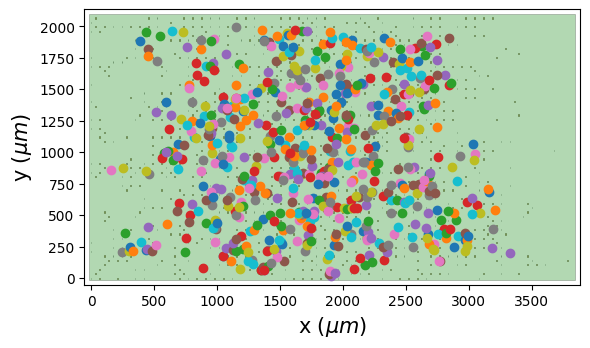

In [11]:

ax = plt.subplot(111)
sw.plot_probe_map(recording,ax=ax)
for x,y in locations:
    ax.scatter(x,y)

In [17]:


redundant_units = spikeinterface.curation.find_redundant_units(sorting_KS3_test)

print(redundant_units)
print(len(redundant_units))

[[21, 18], [63, 61], [64, 62], [84, 82], [127, 125], [130, 129], [136, 134], [163, 160], [168, 167], [170, 135], [317, 315], [335, 334], [340, 339], [376, 374], [399, 397], [456, 426], [456, 427], [462, 461], [528, 525], [536, 535], [538, 535], [538, 536], [572, 532], [611, 610], [613, 612], [638, 636], [649, 648], [651, 650]]
28


(668, 668)


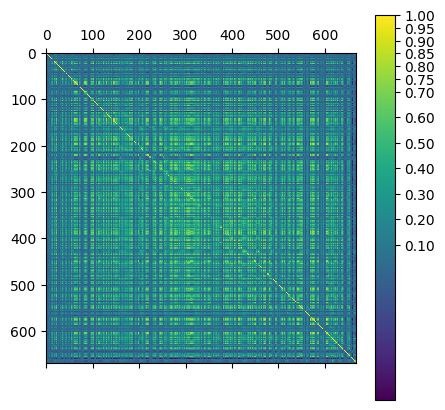

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
sim_mat = sp.compute_template_similarity(waveforms)
print(sim_mat.shape)
cax = ax.matshow(sim_mat)
fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])

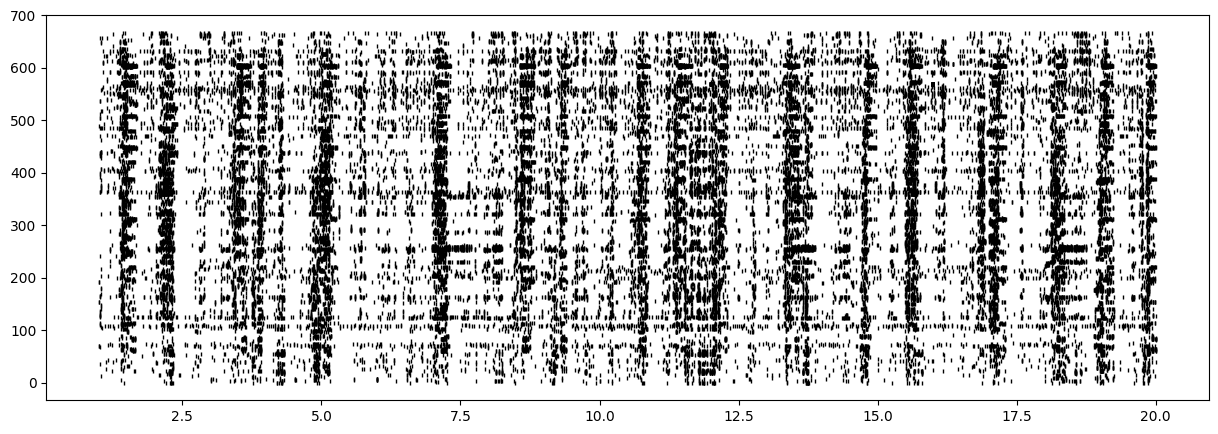

In [18]:
fig, ax1 = plt.subplots(figsize=(15,5))
spike_times = {}
for unit_id in sorting_KS3_test.get_unit_ids():
    spike_train = sorting_KS3_test.get_unit_spike_train(unit_id,start_frame=1*fs,end_frame=20*fs)
    if len(spike_train) > 0:
        spike_times[unit_id] = spike_train / float(fs)
        #print(spike_times[unit_id])
       # print(unit_id*np.ones_like(spike_times[unit_id]))
        ax1.plot(spike_times[unit_id],unit_id*np.ones_like(spike_times[unit_id]),
                             marker='|', mew=1, markersize=3,
                             ls='',color='black')
                             
#print(spike_times)

/home/mxwbio/.local/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:443: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


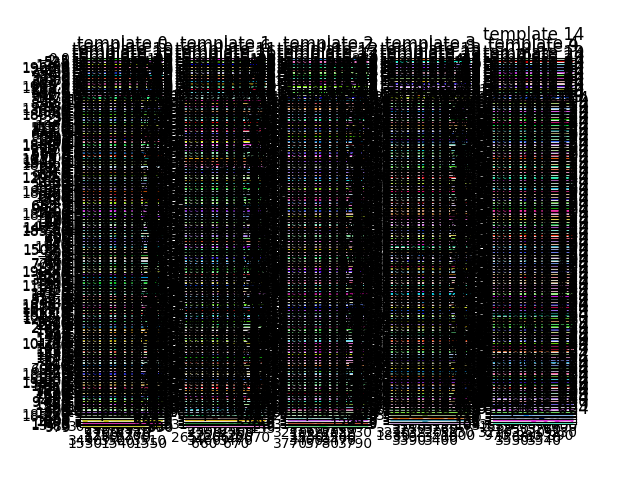

In [26]:
%matplotlib widget
w = sw.plot_unit_templates(waveforms, radius_um=30)

/home/mxwbio/.local/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:443: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


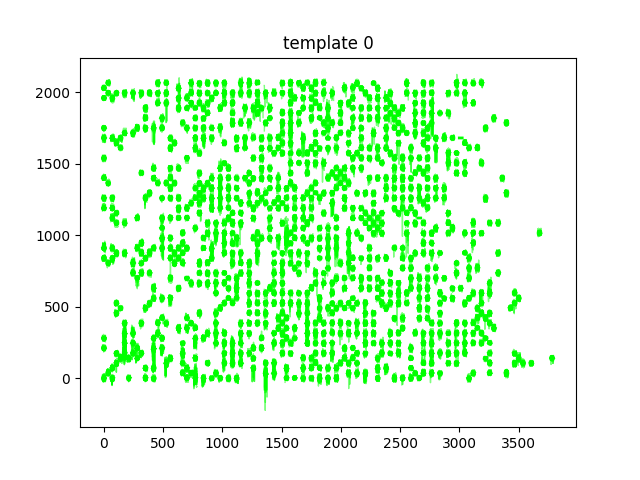

In [29]:
sw.plot_unit_waveforms(waveforms,unit_ids=sorting_KS3_test.unit_ids[:1])

(76, 60, 1020)


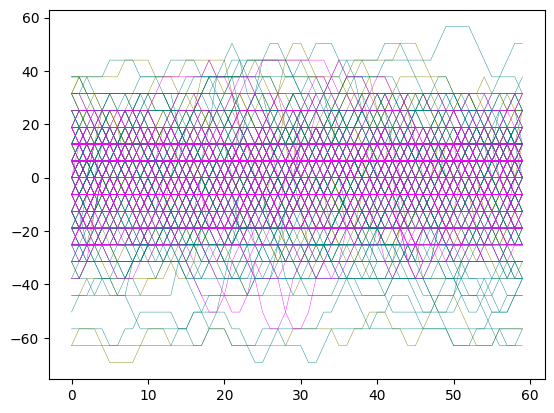

In [31]:
colors = ['Olive', 'Teal', 'Fuchsia']

fig, ax = plt.subplots()
wf=[]
for i, unit_id in enumerate(sorting_KS3_test.unit_ids[317:320]):
    wf = waveforms.get_waveforms(unit_id)
    color = colors[i]
    ax.plot(wf[:, :, 988].T, color=color, lw=0.3)
print(wf.shape)

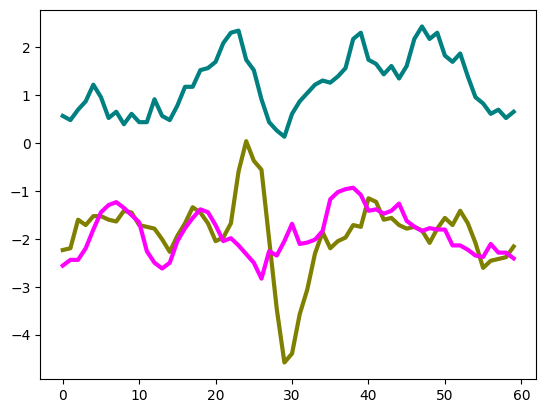

In [25]:
fig, ax = plt.subplots()
for i, unit_id in enumerate(sorting_KS3_test.unit_ids[316:319]):
    template = waveforms.get_template(unit_id)
    color = colors[i]
    ax.plot(template[:, 988].T, color=color, lw=3)

In [22]:
extremum_channels_ids =spikeinterface.full.get_template_extremum_channel(waveforms, peak_sign='neg')
print(extremum_channels_ids)

{0: '352', 1: '320', 2: '29', 3: '256', 4: '188', 5: '204', 6: '64', 7: '40', 8: '372', 9: '38', 10: '78', 11: '78', 12: '241', 13: '158', 14: '138', 15: '322', 16: '0', 17: '320', 18: '268', 19: '268', 20: '268', 21: '268', 22: '496', 23: '496', 24: '496', 25: '192', 26: '96', 27: '80', 28: '80', 29: '388', 30: '14', 31: '366', 32: '498', 33: '712', 34: '388', 35: '160', 36: '212', 37: '400', 38: '108', 39: '76', 40: '4', 41: '32', 42: '82', 43: '82', 44: '82', 45: '966', 46: '0', 47: '442', 48: '442', 49: '712', 50: '498', 51: '498', 52: '512', 53: '484', 54: '372', 55: '372', 56: '372', 57: '172', 58: '224', 59: '388', 60: '132', 61: '4', 62: '4', 63: '4', 64: '4', 65: '4', 66: '52', 67: '52', 68: '82', 69: '11', 70: '286', 71: '442', 72: '490', 73: '454', 74: '494', 75: '388', 76: '11', 77: '436', 78: '11', 79: '544', 80: '103', 81: '232', 82: '232', 83: '232', 84: '232', 85: '4', 86: '52', 87: '98', 88: '90', 89: '90', 90: '306', 91: '310', 92: '494', 93: '449', 94: '966', 95: '96

['340' '352']


/home/mxwbio/.local/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:443: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


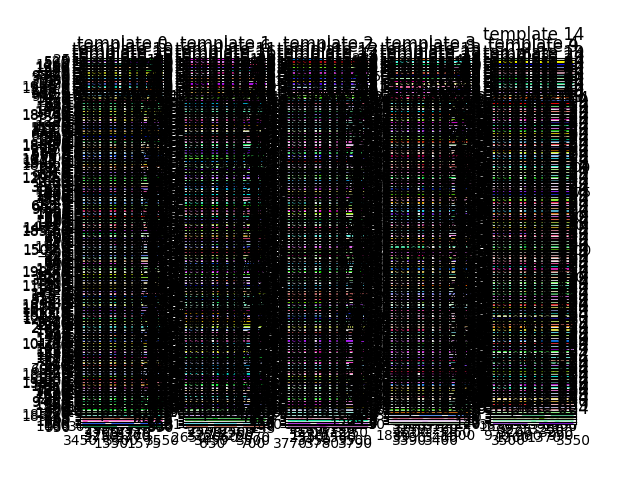

In [30]:

sparsity_radius = sp.get_template_channel_sparsity(waveforms, method="radius", radius_um=50)
print(sparsity_radius[sorting_KS3_test.unit_ids[0]])
sw.plot_unit_templates(waveforms,sparsity= sparsity_radius)

In [15]:
waveforms0 = waveforms.get_waveforms(unit_id=0)
print(f"Waveforms shape: {waveforms0.shape}")
template0 = waveforms.get_template(unit_id=0)
print(f"Template shape: {template0.shape}")
all_templates = waveforms.get_all_templates()
print(f"All templates shape: {all_templates.shape}")

Waveforms shape: (199, 140, 1020)
Template shape: (140, 1020)
All templates shape: (668, 140, 1020)


In [ ]:
sw.plot_unit_locations(waveforms)

In [ ]:
ccgs, bins = sp.compute_correlograms(waveforms)

In [ ]:
sw.plot_autocorrelograms(waveforms, unit_ids=sorting_KS3_test.unit_ids[:3])

In [ ]:
sw.plot_crosscorrelograms(waveforms, unit_ids=sorting_KS3_test.unit_ids[:3])

In [ ]:
amplitudes = sp.compute_spike_amplitudes(waveforms, outputs="by_unit", load_if_exists=True)
spike_locations = sp.compute_spike_locations(waveforms, method="center_of_mass", load_if_exists=True)
sw.plot_spike_locations(waveforms, max_spikes_per_unit=300)

Text(0.5, 0, 'time(s)')

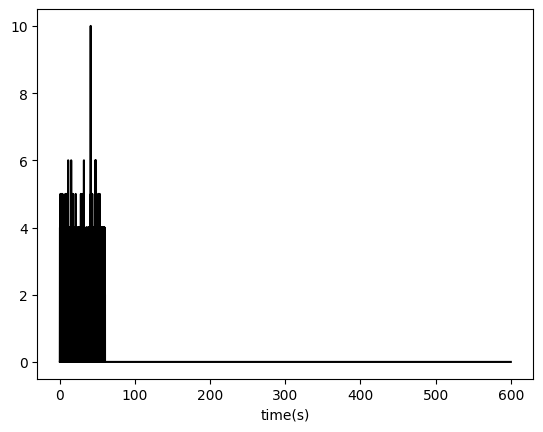

In [19]:
#sum rasters
plt.figure()
s_ids = sorting_KS3_test.get_unit_ids()

network = np.zeros(recording.get_num_frames())
for i in s_ids:
    for j in sorting_KS3_test.get_unit_spike_train(i):
        network[j] = network[j]+1

t = np.arange(0, recording.get_num_frames()/recording.get_sampling_frequency(), 1/recording.get_sampling_frequency())
plt.plot(t,network, color='black')
plt.xlabel('time(s)')
#plt.plot(t, network, 'o', color='blue')

In [ ]:
#run smmorter
#run_sorter = ss.run_kilosort3(recording_bp, output_folder="kilosort3", docker_image="spikeinterface/kilosort3-compiled-base", **default_KS3_params)
#run_sorter = ss.run_kilosort3(recording_bp, output_folder="kilosort3_test", docker_image="spikeinterface/kilosort3-compiled-base", **custom_KS3_params)
recording_chunk2 = recording_bp.frame_slice(start_frame= 180*fs,end_frame=240*fs)
run_sorter = ss.run_kilosort3(recording_chunk2, output_folder="kilosort3_test_mandar180_240schunk", docker_image="latest:latest", verbose=True, **default_KS3_params)

#sorting_KS3 = ss.Kilosort3Sorter._get_result_from_folder('/home/mxwbio/Desktop/MEA_Analysis/kilosort3/')


In [ ]:
sorting_KS3= ss.Kilosort3Sorter._get_result_from_folder('/home/mxwbio/Desktop/MEA_Analysis/kilosort3_test_mandar180_240schunk')
sorting_KS3.get_unit_ids()

In [ ]:
waveforms2 = si.extract_waveforms(recording_chunk2,sorting_KS3,folder="./waveforms2",load_if_exists=False,overwrite=True)

In [ ]:
locations2 = sp.compute_unit_locations(waveforms2)
print(locations2)

In [ ]:
ax1 = plt.subplot(111)
sw.plot_probe_map(recording,ax=ax1)
for x,y in locations2:
    ax1.scatter(x,y)

In [ ]:
sorted_spyKING = ss.run_sorter("spykingcircus",recording_chunk,output_folder='./spyking_sorter',docker_image=True,verbose=True)

In [ ]:
   #cmd = 'wget "https://share.mxwbio.com/d/389aec3a610c4c87b14f/files/?p=%2FLinux%2Flibcompression.so&dl=1" -A so -nc -P /hdf5_plugin/libcompression.so -w 2 '
    #os.system(cmd)
    #os.system('mv )